Problem 4

In [2]:
import numpy as np
letters = list("aeiouy")
english = np.array([0.08167, 0.12702, 0.06966, 0.07507, 0.02758, 0.01974, 0.59926])
polish = np.array([0.10503, 0.07352, 0.08328, 0.02445, 0.02062, 0.03206, 0.66104])
spanish = np.array([.11525, .12181, .06247, .08683, .02927, .01008, .57429])

languages = np.array([english, polish, spanish])
# print(languages)

words = np.array([list("bull"), list("burro"), list("kurczak"), list("pollo"), 
                  list("itwoojczyznomojatyjesteśjakzdrowie"), list("dinero"), 
                  list("mamajustkilledamanputagunagainsthishead"), list("aradonaesmasgrandequepele"),
                  list("car")])

apriori1 = np.array([1./3, 1./3, 1./3])
apriori2 = np.array([5./10, 2./10, 3./10])

for word in words:
    prob1 = apriori1
    prob2 = apriori2
    has_prob = [letter in letters for letter in word]
    for i, j in zip(has_prob, word):
        if(i):
            prob1 *= languages[:, letters.index(j)]
            prob2 *= languages[:, letters.index(j)]
        else:
            prob1 *= languages[:, -1]
            prob2 *= languages[:, -1]
              
    prob1 /= np.sum(prob1)
    prob2 /= np.sum(prob2)
    print(word)
    print(prob1)
    print(prob2)

['b', 'u', 'l', 'l']
[ 0.34041434  0.34161709  0.31796857]
[ 0.50972262  0.20460943  0.28566795]
['b', 'u', 'r', 'r', 'o']
[ 0.42787111  0.1403424   0.43178649]
[ 0.57580762  0.07554633  0.34864605]
['k', 'u', 'r', 'c', 'z', 'a', 'k']
[ 0.36539972  0.18821387  0.44638641]
[ 0.51572462  0.10625791  0.37801747]
['p', 'o', 'l', 'l', 'o']
[ 0.39812094  0.02919851  0.57268055]
[ 0.52842628  0.01550208  0.45607164]
['i', 't', 'w', 'o', 'o', 'j', 'c', 'z', 'y', 'z', 'n', 'o', 'm', 'o', 'j', 'a', 't', 'y', 'j', 'e', 's', 't', 'e', '\xc5', '\x9b', 'j', 'a', 'k', 'z', 'd', 'r', 'o', 'w', 'i', 'e']
[ 0.68906771  0.00175784  0.30917444]
[ 0.78725807  0.00080333  0.2119386 ]
['d', 'i', 'n', 'e', 'r', 'o']
[  7.17571099e-01   5.53762732e-04   2.81875139e-01]
[  8.09061663e-01   2.49747069e-04   1.90688590e-01]
['m', 'a', 'm', 'a', 'j', 'u', 's', 't', 'k', 'i', 'l', 'l', 'e', 'd', 'a', 'm', 'a', 'n', 'p', 'u', 't', 'a', 'g', 'u', 'n', 'a', 'g', 'a', 'i', 'n', 's', 't', 'h', 'i', 's', 'h', 'e', 'a', '

Problem 6

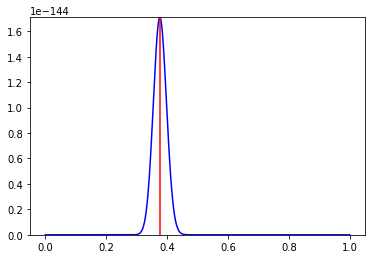

In [553]:
import matplotlib.pyplot as plt

p = np.linspace(0.0, 1.0, 1000)
n = 500

ps = [0.4, 0.5]
success = np.sum([np.random.binomial(1, p=ps) for i in range(n)], axis=0)

L = p**success[0]*(1-p)**(n-success[0])

plt.ylim(0, max(L))
plt.plot(p, L, 'b')
plt.axvline(success[0]/(n*1.0), color='red', linestyle='-')
plt.show()


Problem 7

In [644]:
from enum import Enum

def find_winner(first, second):
    if(first == second):
        return -1
    if(first == 'P' and second == 'R'):
        return 0
    if(first == 'R' and second == 'S'):
        return 0
    if(first == 'S' and second == 'P'):
        return 0
    return 1

seq = np.array(list("PPRSSRSPPRSPRRSPPPSSPRSPSPSRSP"))
unique, counts = numpy.unique(seq, return_counts=True)
counts[0] -= 1
# print(unique, counts)
# Probability matrix, each row simbolize probability of column simbol after row simbol
# Simbols goes P, R, S
letters = ['P', 'R', 'S']
prob = np.zeros(9).reshape((3,3))
for i, j in zip(seq[:-1], seq[1:]):
    prob[letters.index(i)][letters.index(j)] += 1
# print(counts)
# print(prob)
#prob[0] /= 12
prob = prob.T
prob /= counts
prob = prob.T
# print(prob)

counts[0] += 1
Trurl = np.array(counts/(len(seq)*1.0))

lastK = np.random.choice(letters)
lastT = np.random.choice(letters, p=Trurl)
wins = [0,0]
for i in range(10**6):
    winner = find_winner(lastK, lastT)
    if(winner != -1):
        wins[winner] += 1
#     print(lastK, lastT)
#     print(wins)
    lastK = np.random.choice(letters, p=prob[letters.index(lastK)])
    lastT = np.random.choice(letters, p=Trurl)
    
print(wins)

[[ 0.36363636  0.36363636  0.27272727]
 [ 0.          0.14285714  0.85714286]
 [ 0.63636364  0.18181818  0.18181818]]
[329007, 324124]
